In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

from bench_isolation_forest_parallel_predict import test_n_rows_n_features

In [2]:
def plot_speed_up(speed_up_values, x_label, y_label, legend_base):
    ax = sns.heatmap(speed_up_values)
    ax.set(xlabel=x_label, ylabel=y_label)
    plt.show()
    
    for i in range(speed_up_values.shape[0]):
        label_name = "{}={}".format(legend_base, speed_up_values.index.tolist()[i])
        plt.plot(np.arange(0, speed_up_values.shape[1]), 
                 speed_up_values.values[i, :], 
                 label=label_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(np.arange(0, speed_up_values.shape[1]), 
               speed_up_values.columns.tolist())
    plt.legend()
    plt.show()

Benchmark ran on a MacBook Pro with the following specs:

- MacBook Pro (15-inch, 2018)
- Processor: 2,9 GHz Intel Core i9
- Memory: 32 GB 2400 MHz DDR4

# Benchmark

In this notebook we are benchmarking parallelizing Isolation Forest during prediction time. At the moment, prediction runs single-threaded.

More specifically, in this benchmark, we are evaluating the regimes when predict **smaller amounts of samples**, and for different number of features. In this case, it is natural that a parallel algorithm performs slower, as it needs to handle the parallel jobs. However, we are interested in understanding how much slower.

The previous benchmarks evaluated the impact of the amount of data at prediction time (using more data than in this study), and the number of trees and parallel jobs. The previous study can be found here: https://github.com/TechhubLisbon/scikit-learn/blob/iforest-parallel-predict-benchmark/benchmarks/bench_isolation_forest_parallel_predict_v2.ipynb

We will evaluate the impact on runtime of having a smaller amount of prediction data, using the following methodology

**Methodology**
- The used data is randomly generated. The seed is fixed in each test, so we obtain reproducible results.
- We vary the number of samples and the number of features.
- We test with the following number of parallel jobs: 1, 2, 6, and 12.
- We first obtain the runtimes from the current single-threaded Isolation Forest implementation ($t_s$). In the same conditions, we obtain the runtimes of the proposed PR ($t_s$).
- Finally, we obtain the speed up values as $\frac{t_s}{t_p}$. Speed up > 1 means that the parallel method was faster than the single threaded one. Values in ]0, 1] means that the parallel method was slower or similar with the single threaded one.

### Study

In the next cell we define the number of predict samples and features that will be tested. We fixed the number of trees to 100. We repeat each test 10 times, and then we average the runtimes.

We evaluate, then, the impact of increasing the number of parallel jobs.

In each test we output 3 tables: 1) the runtimes of the current single-threaded IForest predict in seconds, 2) the runtimes of the proposed parallel prediction, 3) and the speed ups. In the tables, the rows represent the number of samples and the columns the number of features. We also output a heatmap that represents the speed-up table, i.e., table number 3.

In [3]:
n_samples_list = [1, 10, 25, 50, 100, 250, 500, 750, 
                  1000, 1500, 2500, 5000, 7500]
n_features_list = [10, 25, 50, 100, 200, 500]
repetitions = 10
n_trees = 100

13it [14:05, 170.36s/it]

	Current prediction execution time:


,10,25,50,100,200,500
1,0.029093,0.028698,0.028231,0.026568,0.027160,0.027705
10,0.026894,0.028492,0.029232,0.027919,0.028882,0.030536
25,0.029302,0.029083,0.029818,0.030307,0.032502,0.035334
50,0.029349,0.030898,0.031675,0.031699,0.034788,0.043158
100,0.032517,0.032758,0.034110,0.035900,0.041888,0.054459
250,0.036715,0.039716,0.042307,0.049687,0.058509,0.086570
500,0.046246,0.048721,0.055747,0.064959,0.084226,0.142896
750,0.055170,0.062426,0.068348,0.081684,0.111596,0.205552
1000,0.060758,0.067362,0.078959,0.096718,0.135143,0.277057
1500,0.072927,0.083748,0.097297,0.125856,0.186428,0.409603


	Pull request prediction execution time:


,10,25,50,100,200,500
1,0.028775,0.028045,0.027926,0.027154,0.027166,0.029169
10,0.027237,0.028945,0.028667,0.028174,0.029428,0.030657
25,0.028644,0.028861,0.029363,0.030763,0.031745,0.035042
50,0.029590,0.031039,0.031562,0.032357,0.036247,0.042659
100,0.032634,0.033931,0.034357,0.036225,0.041716,0.055635
250,0.038050,0.040015,0.042313,0.048826,0.058500,0.086855
500,0.045666,0.048665,0.054791,0.065361,0.083715,0.143363
750,0.055204,0.060492,0.067034,0.082128,0.111721,0.205104
1000,0.060612,0.067390,0.080023,0.095020,0.134681,0.274062
1500,0.074245,0.083373,0.096964,0.125246,0.186550,0.402247


	Speed up:


,10,25,50,100,200,500
1,1.011059,1.023294,1.010929,0.978421,0.999782,0.949799
10,0.987384,0.984350,1.019682,0.990952,0.981427,0.996062
25,1.022976,1.007704,1.015510,0.985192,1.023850,1.008332
50,0.991848,0.995462,1.003561,0.979654,0.959750,1.011713
100,0.996411,0.965434,0.992817,0.991032,1.004108,0.978861
250,0.964925,0.992518,0.999856,1.017638,1.000152,0.996713
500,1.012705,1.001140,1.017455,0.993848,1.006110,0.996745
750,0.999399,1.031966,1.019604,0.994593,0.998877,1.002182
1000,1.002399,0.999588,0.986705,1.017873,1.003431,1.010926
1500,0.982245,1.004499,1.003441,1.004872,0.999344,1.018287


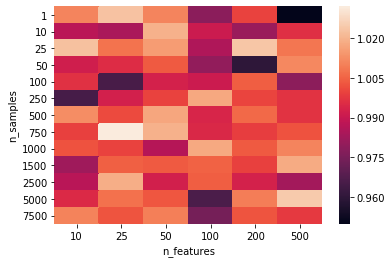

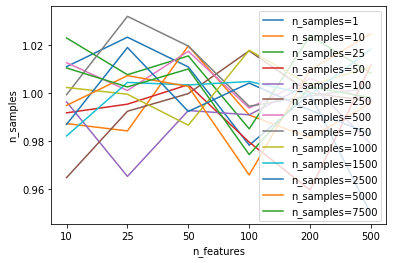

CPU times: user 13min 12s, sys: 54.1 s, total: 14min 6s
Wall time: 14min 6s


In [4]:
%%time

n_jobs = 1

results_sklearn_iforest_n_samples, results_parallel_iforest_n_samples, speed_up_n_samples = \
    test_n_rows_n_features(n_samples_list=n_samples_list, n_features_list=n_features_list, 
                           n_jobs=n_jobs, repetitions=repetitions, 
                           n_trees=n_trees)

print("\tCurrent prediction execution time:")
display(results_sklearn_iforest_n_samples)
print("\tPull request prediction execution time:")
display(results_parallel_iforest_n_samples)
print("\tSpeed up:")
display(speed_up_n_samples)

plot_speed_up(speed_up_n_samples, x_label="n_features", 
              y_label="n_samples", legend_base="n_samples")

Next, we test having 2 parallel jobs.

13it [12:23, 126.22s/it]

	Current prediction execution time:


,10,25,50,100,200,500
1,0.034108,0.033371,0.031560,0.032320,0.033588,0.035045
10,0.034201,0.033329,0.032838,0.033854,0.033886,0.035303
25,0.034614,0.034895,0.035217,0.034952,0.036160,0.039279
50,0.035546,0.035651,0.036008,0.037613,0.039282,0.046718
100,0.038935,0.037843,0.039373,0.041628,0.047250,0.059211
250,0.042762,0.044314,0.046487,0.052626,0.062627,0.092906
500,0.051815,0.057296,0.061067,0.070503,0.091111,0.155107
750,0.058869,0.064259,0.071747,0.086850,0.116592,0.226543
1000,0.067068,0.074332,0.083451,0.104659,0.146657,0.289895
1500,0.082413,0.090100,0.106178,0.139634,0.200307,0.457692


	Pull request prediction execution time:


,10,25,50,100,200,500
1,0.109469,0.108957,0.108435,0.109088,0.109504,0.110347
10,0.109804,0.109873,0.108043,0.106890,0.108221,0.108416
25,0.108764,0.109035,0.111249,0.108547,0.109478,0.110214
50,0.109268,0.109244,0.107808,0.107214,0.109235,0.109499
100,0.109815,0.109715,0.109780,0.110540,0.109486,0.109782
250,0.109550,0.109298,0.108588,0.109833,0.110376,0.109112
500,0.110044,0.108290,0.111100,0.111074,0.119799,0.204806
750,0.108972,0.107649,0.106411,0.109244,0.109133,0.216652
1000,0.110433,0.109641,0.109397,0.108017,0.162423,0.248566
1500,0.109655,0.110454,0.107017,0.118070,0.219077,0.422004


	Speed up:


,10,25,50,100,200,500
1,0.311573,0.306280,0.291047,0.296275,0.306724,0.317590
10,0.311473,0.303343,0.303936,0.316717,0.313114,0.325630
25,0.318245,0.320035,0.316559,0.321999,0.330293,0.356385
50,0.325311,0.326341,0.334005,0.350820,0.359604,0.426657
100,0.354547,0.344922,0.358650,0.376590,0.431561,0.539352
250,0.390342,0.405445,0.428105,0.479147,0.567394,0.851481
500,0.470858,0.529096,0.549653,0.634738,0.760528,0.757335
750,0.540226,0.596931,0.674248,0.795013,1.068348,1.045655
1000,0.607319,0.677960,0.762833,0.968905,0.902935,1.166268
1500,0.751568,0.815723,0.992160,1.182630,0.914320,1.084567


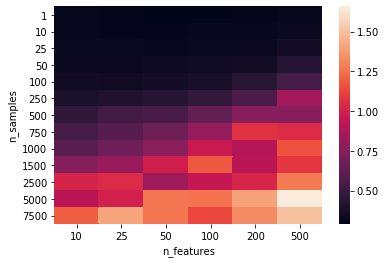

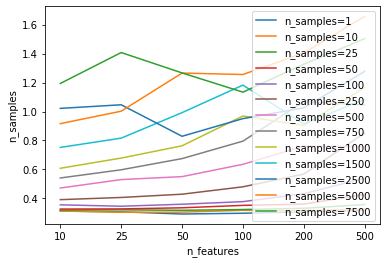

CPU times: user 15min 9s, sys: 1min 19s, total: 16min 29s
Wall time: 12min 24s


In [5]:
%%time

n_jobs = 2

results_sklearn_iforest_n_samples, results_parallel_iforest_n_samples, speed_up_n_samples = \
    test_n_rows_n_features(n_samples_list=n_samples_list, n_features_list=n_features_list, 
                           n_jobs=n_jobs, repetitions=repetitions, 
                           n_trees=n_trees)

print("\tCurrent prediction execution time:")
display(results_sklearn_iforest_n_samples)
print("\tPull request prediction execution time:")
display(results_parallel_iforest_n_samples)
print("\tSpeed up:")
display(speed_up_n_samples)

plot_speed_up(speed_up_n_samples, x_label="n_features", 
              y_label="n_samples", legend_base="n_samples")

Next, we test having 6 parallel jobs.

13it [10:04, 92.81s/it]

	Current prediction execution time:


,10,25,50,100,200,500
1,0.032924,0.033324,0.032764,0.032345,0.032887,0.033072
10,0.034184,0.032643,0.033848,0.034001,0.034054,0.035487
25,0.033992,0.034052,0.034866,0.036167,0.036654,0.039414
50,0.036171,0.034998,0.036510,0.037230,0.039106,0.048026
100,0.037239,0.037976,0.039505,0.041740,0.047316,0.058632
250,0.042970,0.045411,0.048228,0.054891,0.065156,0.098597
500,0.052890,0.055190,0.063317,0.076095,0.097773,0.195923
750,0.060319,0.068642,0.073588,0.090600,0.124736,0.272348
1000,0.067088,0.074818,0.085996,0.107715,0.151648,0.342827
1500,0.081698,0.092001,0.109016,0.144209,0.248031,0.554736


	Pull request prediction execution time:


,10,25,50,100,200,500
1,0.111294,0.110495,0.109927,0.109820,0.110692,0.109105
10,0.109186,0.109302,0.109343,0.110386,0.110360,0.110133
25,0.108510,0.109170,0.109223,0.110724,0.109923,0.110877
50,0.109173,0.109933,0.110419,0.109012,0.109510,0.109161
100,0.106988,0.111989,0.110382,0.109985,0.111559,0.109624
250,0.108362,0.108705,0.121490,0.109741,0.110592,0.110540
500,0.112285,0.120318,0.118510,0.111316,0.120285,0.183125
750,0.110429,0.109373,0.109492,0.120164,0.110307,0.217988
1000,0.110817,0.110850,0.109677,0.109257,0.111795,0.217650
1500,0.108483,0.110256,0.109371,0.110345,0.216243,0.324884


	Speed up:


,10,25,50,100,200,500
1,0.295828,0.301584,0.298053,0.294528,0.297103,0.303117
10,0.313080,0.298650,0.309560,0.308020,0.308567,0.322222
25,0.313261,0.311917,0.319216,0.326637,0.333454,0.355476
50,0.331317,0.318356,0.330648,0.341522,0.357095,0.439955
100,0.348062,0.339107,0.357892,0.379508,0.424136,0.534840
250,0.396539,0.417741,0.396971,0.500182,0.589158,0.891963
500,0.471033,0.458699,0.534279,0.683594,0.812838,1.069887
750,0.546223,0.627594,0.672085,0.753973,1.130803,1.249374
1000,0.605394,0.674943,0.784087,0.985887,1.356482,1.575128
1500,0.753093,0.834434,0.996758,1.306892,1.147001,1.707489


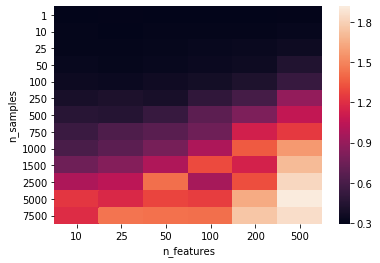

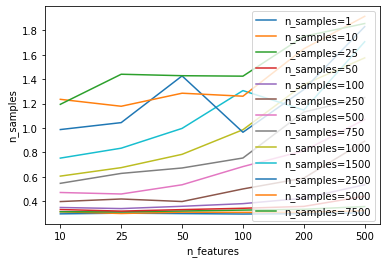

CPU times: user 19min 42s, sys: 2min 50s, total: 22min 33s
Wall time: 10min 4s


In [6]:
%%time

n_jobs = 6

results_sklearn_iforest_n_samples, results_parallel_iforest_n_samples, speed_up_n_samples = \
    test_n_rows_n_features(n_samples_list=n_samples_list, n_features_list=n_features_list, 
                           n_jobs=n_jobs, repetitions=repetitions, 
                           n_trees=n_trees)

print("\tCurrent prediction execution time:")
display(results_sklearn_iforest_n_samples)
print("\tPull request prediction execution time:")
display(results_parallel_iforest_n_samples)
print("\tSpeed up:")
display(speed_up_n_samples)

plot_speed_up(speed_up_n_samples, x_label="n_features", 
              y_label="n_samples", legend_base="n_samples")

Next, we test having 12 parallel jobs.

13it [12:49, 127.41s/it]

	Current prediction execution time:


,10,25,50,100,200,500
1,0.033945,0.034137,0.031630,0.032787,0.033093,0.033892
10,0.032766,0.033058,0.033621,0.033521,0.034068,0.035484
25,0.034962,0.034096,0.034481,0.035207,0.036139,0.039142
50,0.034765,0.035128,0.036008,0.036660,0.039075,0.046638
100,0.037479,0.038325,0.039235,0.041648,0.047034,0.057736
250,0.042856,0.042923,0.046188,0.052910,0.062130,0.091489
500,0.048719,0.054304,0.058264,0.068343,0.092511,0.156191
750,0.058615,0.065058,0.069907,0.087089,0.116739,0.219181
1000,0.066374,0.075575,0.082846,0.126856,0.213820,0.492581
1500,0.114914,0.126780,0.137872,0.187075,0.330887,0.741115


	Pull request prediction execution time:


,10,25,50,100,200,500
1,0.110060,0.110379,0.112643,0.111772,0.111000,0.109500
10,0.113725,0.111780,0.112532,0.112516,0.108997,0.112741
25,0.112312,0.110473,0.110696,0.110978,0.112530,0.111833
50,0.110333,0.110085,0.112747,0.110687,0.111373,0.111900
100,0.111371,0.111648,0.113652,0.112262,0.109621,0.112830
250,0.114233,0.111759,0.111023,0.112601,0.111236,0.111367
500,0.111604,0.121976,0.112473,0.111561,0.109922,0.175015
750,0.111836,0.109889,0.108532,0.110197,0.111677,0.218147
1000,0.111596,0.109834,0.110733,0.164026,0.215616,0.321805
1500,0.216366,0.216029,0.216583,0.216349,0.255590,0.428797


	Speed up:


,10,25,50,100,200,500
1,0.308425,0.309273,0.280797,0.293336,0.298134,0.309515
10,0.288113,0.295738,0.298771,0.297923,0.312563,0.314742
25,0.311289,0.308639,0.311496,0.317242,0.321150,0.350004
50,0.315094,0.319097,0.319367,0.331203,0.350845,0.416785
100,0.336527,0.343262,0.345224,0.370991,0.429060,0.511707
250,0.375161,0.384065,0.416024,0.469886,0.558540,0.821507
500,0.436533,0.445197,0.518025,0.612608,0.841609,0.892446
750,0.524117,0.592036,0.644121,0.790306,1.045321,1.004738
1000,0.594769,0.688086,0.748160,0.773392,0.991669,1.530682
1500,0.531108,0.586867,0.636577,0.864693,1.294601,1.728357


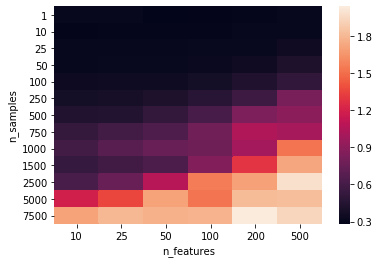

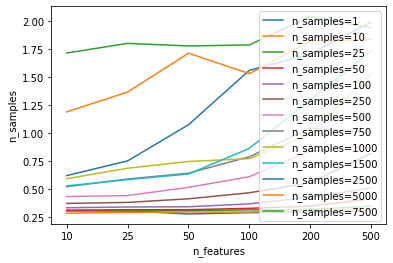

CPU times: user 32min 57s, sys: 5min 35s, total: 38min 33s
Wall time: 12min 49s


In [7]:
%%time

n_jobs = 12

results_sklearn_iforest_n_samples, results_parallel_iforest_n_samples, speed_up_n_samples = \
    test_n_rows_n_features(n_samples_list=n_samples_list, n_features_list=n_features_list, 
                           n_jobs=n_jobs, repetitions=repetitions, 
                           n_trees=n_trees)

print("\tCurrent prediction execution time:")
display(results_sklearn_iforest_n_samples)
print("\tPull request prediction execution time:")
display(results_parallel_iforest_n_samples)
print("\tSpeed up:")
display(speed_up_n_samples)

plot_speed_up(speed_up_n_samples, x_label="n_features", 
              y_label="n_samples", legend_base="n_samples")

#### Final remarks 

In this notebook, we studied the runtime of running ITrees in parallel during prediction, in a region of **small amounts of samples**.

We observe that both the number of samples and features have an impact on the speed ups. Indeed, for smaller amounts of samples and features, the single-threaded approach is always faster. But, the parallel approach improves over it when the number of samples and/or features increases. In general, the best we can go with parallel prediction is around 100 ms per prediction call. This applies to, e.g., 1 sample and 10 features, or 100 samples and 500 features. In contrast, the current single thread prediction can achieve a best time of 30 ms per prediction call. This is true for, e.g., 1 sample with 10 features. This is expected, as managing parallel jobs takes some time.

Also, the relationship between the number of samples, features, and the obtained speed ups looks non-linear. We could try to devise a function that defines if a prediction is done in parallel or not, depending on the number of samples and features. However, this could be hardware-dependent, and not general. We could also try to approximate it as linear function, but, again, it could be hardware-dependent.

A simpler approach would be to set a threshold on 5k samples, i.e., during prediction, it would use parallel jobs if there are more than 5k samples, otherwise it would go single-threaded. This is simples, and could accomodate most of the use cases, I believe.